**Цель проекта**
* Установить параметры операясь на которые можно создать автоматизированную систему, которая будет определять рыночную стоимость недвижимости.

**Описание входных данных**
* total_images          - Количество изображений
* last_price            - Цена продажи квартиры.
* total_area            - Общая площадь квартиры.
* first_day_exposition  - Дата размещения объявления о продаже.
* rooms                 - Количество комнат.
* ceiling_height        - Высота потолка.
* floors_total          - Всего этажей в здании.
* living_area           - Объем жилой площади в квартире.
* floor                 - Этаж на котором располагается квартира.
* is_apartment          - Наличие апортаментов.( Нужно бы уточнить %)
* studio                - Является ли квартира студией.
* open_plan             - Наличие планировки.
* kitchen_area          - Площадь кухни.
* balcony               - Количество балконов.
* locality_name         - Название населённого пункта, в котором располагается квартира.
* airports_nearest      - Растояние до ближайшего аэропорта.
* cityCenters_nearest   - Растояние до центра города.
* parks_around3000      - Количество парков в радиусе 3000 метров.
* parks_nearest         - Растояние до ближайшего паркаю
* ponds_around3000      - Количество прудов в радиусе 3000 метров.
* ponds_nearest         - Растояние до ближайшего парка.
* days_exposition       - Кол-во дней от Публикации объявления, до продажи квартиры.

**План работы**

* Просмотр и изучение данных.
* Предобработка данных.
* Исследование данных и посик корреляций.
* Общий вывод.

### Import


In [506]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings  
import numpy as np

warnings.filterwarnings("ignore")

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
first_data_info = data
display(data.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [507]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

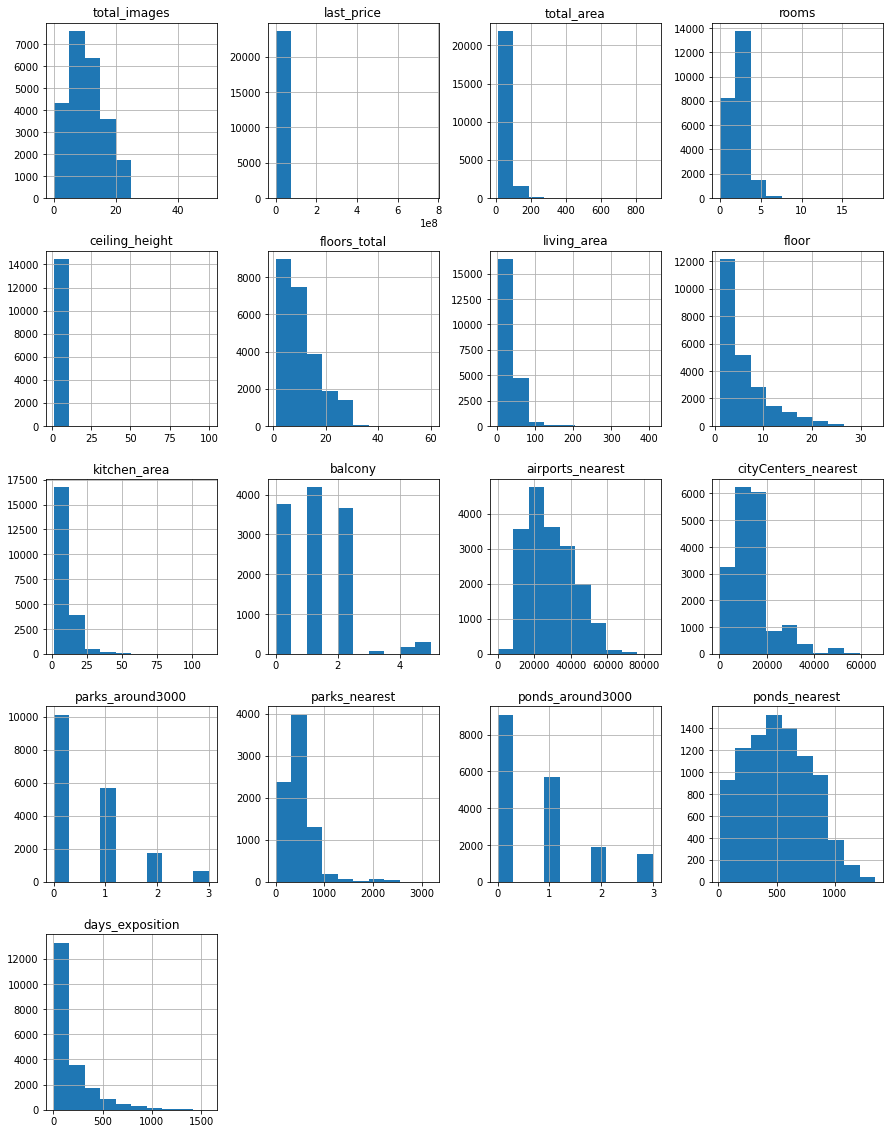

In [508]:
data.hist(figsize = (15, 20))

In [509]:
print(data.isna().sum(), '\n')
print('Дубликаты:', data.duplicated().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64 

Дубликаты: 0


In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

# Вывод по первому просмотру

* **Пропуски располагаются как в значениях указанных пользователем, так и автоматических(картографических)**
* **Наблюдаются столбцы, значения в которых имеют тип данных float, когда подразумиваются целочисленные (int)**
* **Явных дубликатов не наблюдается**
* **На первичных гистограмах аномальными смотрятся только балконы свыше 4ех** 

### Предобработка данных

In [511]:
print(data.columns)
# Просмотр отсутствующих значений в столбцах   

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


# Локация и удаление неявных дубликатов

In [512]:
#Просмотр и поиск неявных дубликатов в столбце 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [513]:
#Удаления неявных дубликатов в Названиях локации, где совершалась продажа
#Чначала частные случаи, потом общие
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино' )
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино' )
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово' )
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Красный Бор', 'Красный Бор' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Рощино', 'поселок городского типа Рощино' )
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рощино', 'поселок городского типа Рощино' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово', 'поселок городского типа Павлово' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Советский', 'поселок городского типа Советский' )
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Лесогорский', 'поселок городского типа Лесогорский' )
data['locality_name'] = data['locality_name'].replace('садовое товарищество Рахья', 'поселок городского типа Рахья' )
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Мга', 'поселок городского типа Мга' )
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Вещево', 'поселок станции Вещево' )
data['locality_name'] = data['locality_name'].replace('поселок станции Вещево', 'поселок станции Вещево' )
data['locality_name'] = data['locality_name'].replace('поселок городского типа Приладожский', 'поселок городского типа Приладожский' )
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский' )
data['locality_name'] = data['locality_name'].replace('городской посёлок Назия', 'поселок городского типа Назия' )
data['locality_name'] = data['locality_name'].replace('деревня Гарболово', 'поселок Гарболово' )
data['locality_name'] = data['locality_name'].replace('посёлок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское' )
data['locality_name'] = data['locality_name'].replace('поселок Любань', 'Любань' )
data['locality_name'] = data['locality_name'].replace('посёлок станции Громово', 'поселок Громово' )
data['locality_name'] = data['locality_name'].replace('коттеджный посёлок Лесное', 'поселок Лесное' )

#Общие случаи. Замещаем все 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('ё','е')

data['locality_name'].unique() # пересмотр

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
   

# Изменение типов данных и простые пропуски

In [514]:
#Приводим дату к типу 'datetime, для дальнейших операций по методам к нему. 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')

In [515]:
# смотрим уникальные значения столбца
data['is_apartment'].unique()
#принимаем решение заполнить пропуски отрицанием наличия
data['is_apartment'] = data['is_apartment'].fillna(value = False)

In [516]:
#Приводим стоимость квартир к целочисленному значению 
data['last_price'] = data['last_price'].astype(int)

In [517]:
# Замена отсутствующих значений и изменение типа данных балконов
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [518]:
# Приводим значения этажности к целочисленным
data['floor'] = data['floor'].astype(int)


In [519]:

# Проверяем взаимосвязь пропущенных значений, для уверенного замещения NaN на 0
print(data.loc[(data['parks_around3000'].isna() == True ) & (data['parks_nearest'].isna() == True) ].shape)
print(data.loc[(data['parks_around3000'].isna() == 0 ) & (data['parks_nearest'].isna() == True)].shape)
            #Отсутствие значений в растоянии до парка соответствуют отсутствию значений в радиусе3000 
print(data.loc[(data['ponds_around3000'].isna() == True ) & (data['ponds_nearest'].isna() == True) ].shape)
print(data.loc[(data['ponds_around3000'].isna() == 0 ) & (data['ponds_nearest'].isna() == True)].shape)
            #Отсутствие значений в растоянии до пруда соответствуют отсутствию значений в радиусе3000 
    
#Заменяем все пропуски в столбцах выше
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

(5518, 22)
(10102, 22)
(5518, 22)
(9071, 22)


# Дроп сложнозаполнимых значений

In [520]:
# Дропним из датафрейма столбцы с неизвестными днями продажи и расположением
print(data['locality_name'].isna().sum())
print(data['floors_total'].isna().sum())

49
86


In [521]:
#Принимаем решение отчистить данные с неизвестной локацией 
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# Заполним пропуски в сроке продажи числом 9999, с последующим исключением его в статистике, где оно влияет
data['days_exposition'].fillna(9999, inplace = True)

# Обработка остальных значений по столбцам:


# Высота потолков

In [522]:
print(data.isna().sum())
print(data['ceiling_height'].describe())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64
count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
[ 25.    32.    27.    24.    26.     1.2    8.3   14.     1.75  20.
  22.6   27.5   10.3    1.   100.  ]


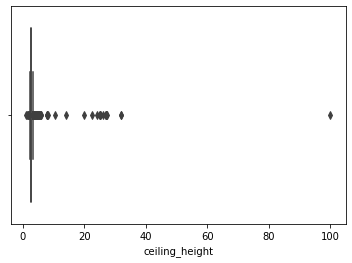

In [523]:
#Работаем со значениями высоты потолков

#Допускаем существование двухэтажных квартир, тогда высота потолков может достигать 10 метров. 

#Поиск очень выдающихся значений в столбцах через метод describe 

import seaborn as sns 
sns.boxplot(x = 'ceiling_height', data = data)
print(data.describe()['ceiling_height'])

#Значения более 3 метров и менее 2ух встречаются достаточно редко относительно основной массы
# аномалии представляют из себя двухэтажные квартиры и ошибки в заполнении высотой более 20 метров

anomaly = data.query('ceiling_height < 2 or ceiling_height > 8')
print(anomaly['ceiling_height'].unique())

# Изменяем явные ошибки в высоте потолков, разделив все значения больше 20 на 10.
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10


In [524]:
#Заполняем пропуски на ближайшие значения, что в целом - плавно распределит их между значениями.
data['ceiling_height'].fillna(method = 'ffill', inplace = True)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest        5524
cityCenters_nearest     5501
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

[ 1.2   8.3  14.    1.75 20.   10.3   1.   10.  ]
Процент значений: 0.05516656057712709 %
AxesSubplot(0.125,0.125;0.775x0.755)
count    23533.000000
mean         2.727048
std          0.276475
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


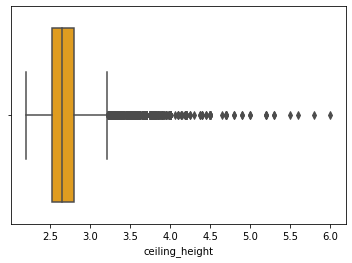

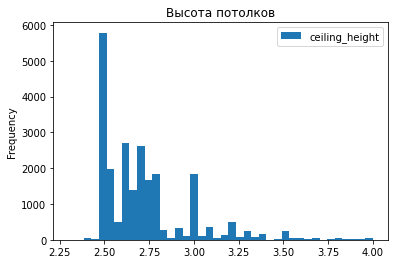

In [525]:
# cмотрим оставшиеся уникальные значения.
anomaly = data.query('ceiling_height < 2 or ceiling_height > 8')
print(anomaly['ceiling_height'].unique())

#cмотрим объем этих значений в % от общего
print('Процент значений:', len(data.query('ceiling_height < 2 or ceiling_height > 8'))
      /len(data)*100, '%')

# Принимаем решение сделать срез, оставляя наиболее правдоподобные данные, избегая вброса
clean_data = data.query('ceiling_height > 2 and ceiling_height < 8')

#смотрим новые значения
print(sns.boиxplot(x = 'ceiling_height', data = clean_data, color = 'orange'))
print(clean_data['ceiling_height'].describe())
#print(clean_data.hist(column = 'ceiling_height', bins = 50))
print(clean_data.plot(kind = 'hist', y = 'ceiling_height',  title = 'Высота потолков',
                     bins = 40, range =(2.3 ,4) ))

# Итого: std был уменьшен с  1.261056 до 0.220673

**Убраны наиболее неправдоподобные значения высоты потолков с желанием сохранить редкие, но правдивые варианты двухэтажных квартир**

# Жилая и кухонная площади

In [526]:
#Проверяем аномальные значения где общая площадь меньше чем сумма площадей 'жилой' и 'кухни'

print(clean_data[(clean_data['total_area']) < (clean_data['living_area'] + clean_data['kitchen_area'])]['total_area'].count())

64


In [527]:

print(clean_data.isna().sum())
# Обрабатываем значения 'kitchen_area' и 'living_area'

#ищем средние значения кухни и жилой площадей от общей площади.
mean_kitchen = clean_data['kitchen_area'].mean() / clean_data['total_area'].mean()    
print('средний размер кухни:', mean_kitchen *100, '% от общей площади')
mean_living = clean_data['living_area'].mean() / clean_data['total_area'].mean()
print('средний размер жилой площади:', mean_living *100, '% от общей площади')

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1862
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2217
balcony                    0
locality_name              0
airports_nearest        5511
cityCenters_nearest     5488
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64
средний размер кухни: 17.507644027144025 % от общей площади
средний размер жилой площади: 57.12110436871761 % от общей площади


AxesSubplot(0.125,0.125;0.775x0.755)


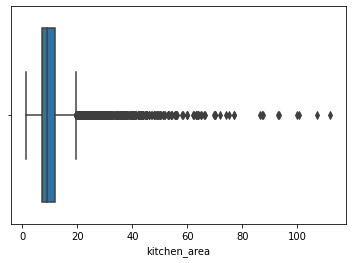

In [528]:
# Заполняем пропуски kitchen_area средним значением от total_area для каждой строки 
clean_data.loc[:,'kitchen_area'].fillna(mean_kitchen * data.loc[:,'total_area'], inplace = True)


print(sns.boxplot(x = 'kitchen_area', data = clean_data))


AxesSubplot(0.125,0.125;0.775x0.755)
count    23533.000000
mean        34.599134
std         22.382333
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


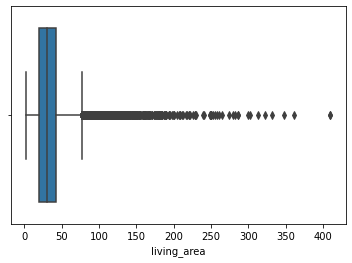

In [529]:
# Заполняем пропуски living_area средним значением от total_area для каждой строки 
clean_data.loc[:, 'living_area'].fillna(mean_living * data.loc[:, 'total_area'], inplace = True)

print(sns.boxplot(x = 'living_area', data = clean_data))
print(clean_data['living_area'].describe())

Процент значений: 0.7053924276547827 %
AxesSubplot(0.125,0.125;0.775x0.755)
count    23333.000000
mean        33.698656
std         18.094948
min         10.080000
25%         19.000000
50%         30.000000
75%         42.000000
max        149.400000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


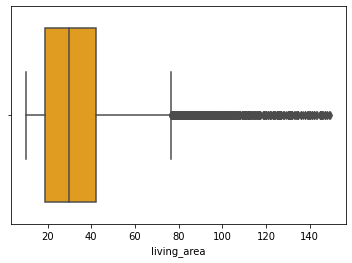

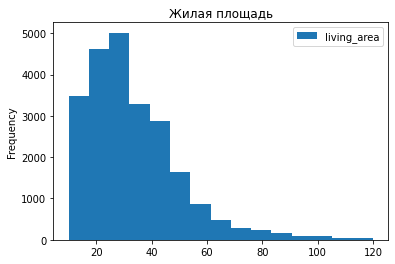

In [530]:
#Устранение квартир с аномально большой и маленькой жил-площадью

print('Процент значений:', len(clean_data.query('living_area < 10 or living_area > 150'))
      /len(clean_data)*100, '%')

clean_data = clean_data.query('living_area > 10 and living_area < 150')
print(sns.boxplot(x = 'living_area', data = clean_data, color = 'orange'))
print(clean_data['living_area'].describe())
print(clean_data.plot(kind = 'hist', y = 'living_area',  title = 'Жилая площадь',
                     bins = 15, range =(10, 120) ))


Процент значений: 0.8357262246603523 %
AxesSubplot(0.125,0.125;0.775x0.755)
count    23094.000000
mean        10.164189
std          4.637708
min          4.026758
25%          7.000000
50%          9.000000
75%         11.800000
max         39.900000
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


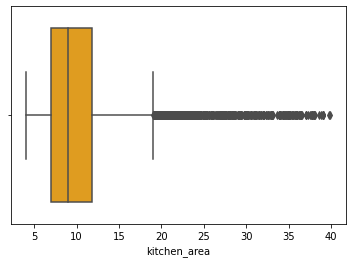

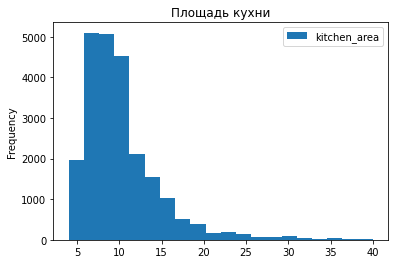

In [531]:
#Устранение квартир с аномально большой и маленькой площадью кухни

print('Процент значений:', len(clean_data.query('kitchen_area < 4 or kitchen_area > 40'))
      /len(clean_data)*100, '%')

clean_data = clean_data.query('kitchen_area > 4 and kitchen_area < 40')
print(sns.boxplot(x = 'kitchen_area', data = clean_data, color = 'orange'))
print(clean_data['kitchen_area'].describe())
print(clean_data.plot(kind = 'hist', y = 'kitchen_area',  title = 'Площадь кухни',
                     bins = 20, range =(4, 40) ))

**В столбцах были заполнены пропуски и убраны очень выдающиеся за квартили значения**

# Cтоимость 

count    2.309400e+04
mean     6.035359e+06
std      6.141710e+06
min      4.300000e+05
25%      3.420000e+06
50%      4.600000e+06
75%      6.700000e+06
max      2.892384e+08
Name: last_price, dtype: float64
Минимальные цены:
17456    430000
14911    430000
16274    440000
16219    450000
17676    450000
Name: last_price, dtype: int64
Максимальные цены:
20349    124480000
13864    130000000
2536     159984000
19155    160000000
22831    289238400
Name: last_price, dtype: int64


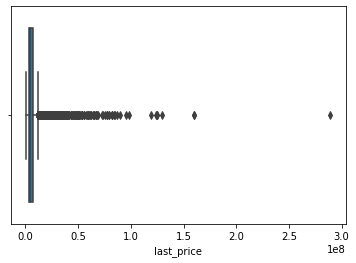

In [532]:
#Обработка стоимости квартир

sns.boxplot( x = 'last_price', data = clean_data)
print(clean_data['last_price'].describe())

print('Минимальные цены:')
print(clean_data['last_price'].sort_values( ascending = True).head())
print('Максимальные цены:')
print( clean_data['last_price'].sort_values( ascending = True).tail())

count    2.256500e+04
mean     5.391484e+06
std      3.140345e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      1.999900e+07
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:title={'center':'Cтоимость квартир'}, ylabel='Frequency'>

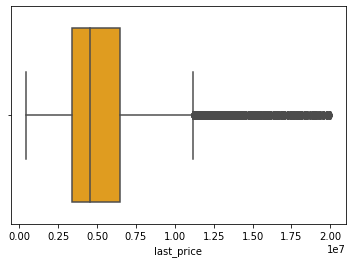

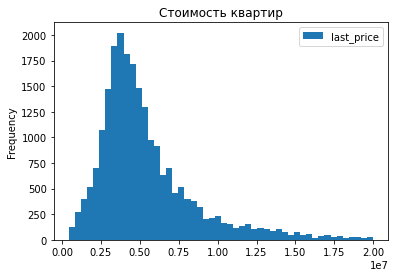

In [533]:
# Исключение незначительного количества неправдоподобно дорогих и дешевых квартир
clean_data = clean_data.query('last_price > 400000 and last_price < 20000000 ')

print(clean_data['last_price'].describe())
print(sns.boxplot( x = 'last_price', data = clean_data, color = 'orange'))

clean_data.plot(kind = 'hist', y = 'last_price',  title = 'Cтоимость квартир', bins = 50, )

**Исключение незначительного количества неправдоподобно дорогих и дешевых квартир**

# Общая площадь

In [534]:
# Повторно просматриваем количество преобладающей суммы составляющих площадей над общей
print(clean_data[(clean_data['total_area']) < (clean_data['living_area'] + clean_data['kitchen_area'])]['total_area'].count())

104


In [535]:
# Принимаем решение заменить общую площадь в строках, где она меньше суммы куханной и жилой, на их сумму 
# умножив на незначительный объём нежилой площади в каждой квартире, которая составляет ~25% 
clean_data.loc[clean_data['total_area'] < (clean_data['living_area'] + clean_data['kitchen_area']),'total_area'] = (clean_data['living_area']+clean_data['kitchen_area'])*1.20

# Даём проверку
print(clean_data[(clean_data['total_area']) < (clean_data['living_area'] + clean_data['kitchen_area'])]['total_area'].count())

0


count    22565.000000
mean        56.586085
std         23.639892
min         20.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        259.600000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


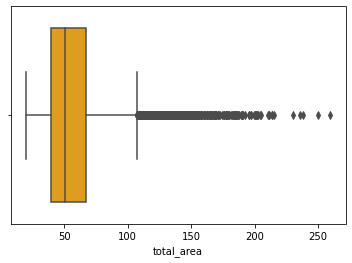

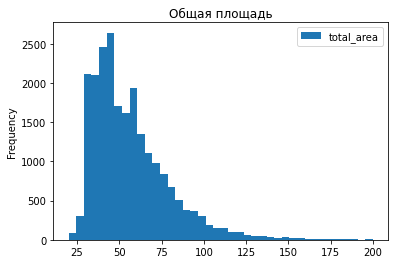

In [536]:
print(clean_data['total_area'].describe())

sns.boxplot( x = 'total_area', data = clean_data, color = 'orange')

print(clean_data.plot(kind = 'hist', y = 'total_area', bins = 40, 
                     title = 'Общая площадь', range = (20, 200)))


**Значения выглядят правдоподобно**

# Количество комнат

count    22565.000000
mean         2.010104
std          0.971991
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
Квартир с комнатами больше 7: 3


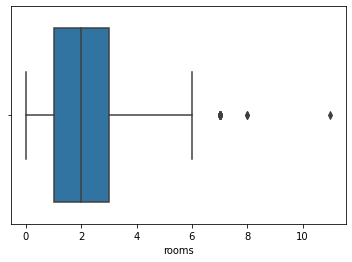

In [537]:
print(clean_data['rooms'].describe())

print(sns.boxplot(x = 'rooms', data = clean_data))

print('Квартир с комнатами больше 7:', clean_data[clean_data['rooms']>7]['rooms'].count() )




AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


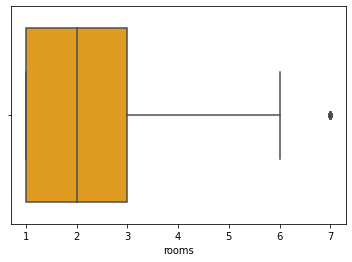

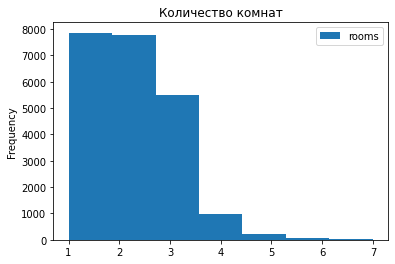

In [538]:
#Аномальное количество больше походит на слияние двух квартир, нежели одну полноценную.

clean_data = clean_data.query('rooms < 8 and rooms > 0')

print(sns.boxplot(x = 'rooms', data = clean_data, color = 'orange'))
clean_data['rooms'].describe()

print(clean_data.plot(kind = 'hist', y = 'rooms', bins = 7, title = 'Количество комнат'))

**Квартиры с очень большим количеством комнат выглядят как слияние двух и более, чем на люксовое жильё. Принято решение исключить их**

# Всего этажей

count    22393.000000
mean        10.687626
std          6.596983
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
       total_images  last_price  total_area first_day_exposition  rooms  \
2253             12     3800000        45.5           2018-06-28      2   
16731             9     3978000        40.0           2018-09-24      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
2253             2.88          60.0         27.4      4         False  ...   
16731            2.65          52.0         10.5     18         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
2253            7.4        0        Кронштадт           67763.0   
16731          14.0        0  Санкт-Петербург           20728.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253     

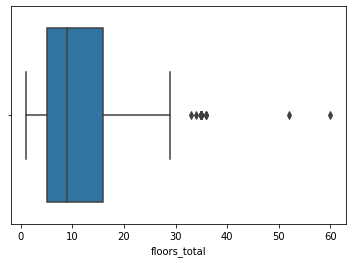

In [539]:
print(clean_data['floors_total'].describe())
print(sns.boxplot( x = 'floors_total', data = clean_data))

print(data[data['floors_total']> 50]) 
#Последние значения максимума этажей привязаны к домам не существующих размеров.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


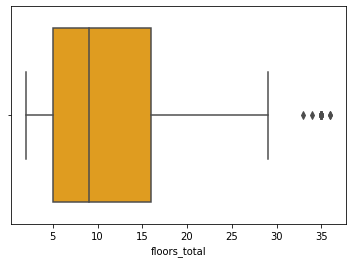

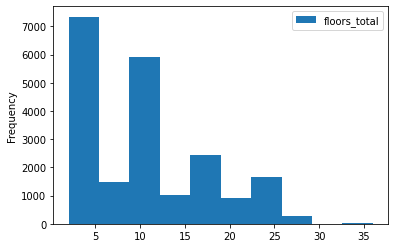

In [634]:
# Принимаем решение убрать все дома этажностью больше 40 
clean_data = clean_data.query('floors_total < 40 and floors_total > 1')
#Заодно удалились нули, которые было нечем заполнять

print(sns.boxplot(x = 'floors_total', data = clean_data, color = 'orange'))

print(clean_data.plot(kind = 'hist', y = 'floors_total'))

In [541]:
# Приводим значения к целочисленным 
clean_data['floors_total'] = clean_data['floors_total'].astype(int)

**Строки в которых были указаны дома с очень большим количеством этажей являются скорее фальсификацией, ошибкой внесения данных или случайным вбросом. ( в Кронштадте нету дома с высотностью в 60 этажей) Принято решение отсеять этажность больше 40ка.**

**Одноэтажные дома являются, скорее, котеджами и домами, чем квартирами**

# Этаж квартиры

count    22368.000000
mean         5.860560
std          4.863405
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


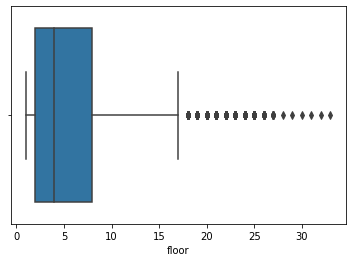

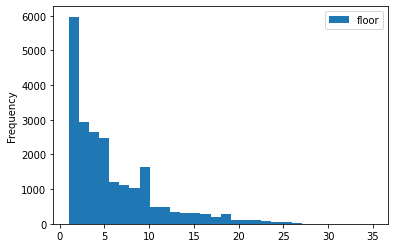

In [542]:
print(clean_data['floor'].describe())

print(sns.boxplot(x = 'floor', data = clean_data))

print(clean_data.plot(kind = 'hist', y = 'floor', bins = 30, range = (1, 35) ))

In [543]:
# Приводим значения к целочисленным 
clean_data['floor'] = clean_data['floor'].astype(int)

**Аномальностей не наблюдается**

# Балконы

count    22368.000000
mean         0.593348
std          0.956399
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.0,2016-05-04,3,2.60,14,59.000000,8,False,...,12.0,5,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
116,18,10999000,97.2,2017-11-13,3,2.50,16,55.521713,16,False,...,18.3,5,Санкт-Петербург,19426.0,21138.0,0.0,0.0,2.0,390.0,394.0
267,2,14700000,120.0,2018-09-07,3,2.75,20,63.000000,18,False,...,16.0,5,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0
311,20,12500000,86.0,2018-10-19,3,2.80,25,47.000000,3,False,...,13.0,5,Санкт-Петербург,52192.0,15686.0,0.0,0.0,1.0,441.0,9999.0
336,10,7700000,79.0,2019-03-11,3,2.90,12,47.000000,11,False,...,15.0,5,Санкт-Петербург,38622.0,14116.0,0.0,0.0,0.0,0.0,9999.0


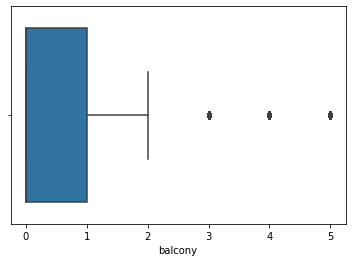

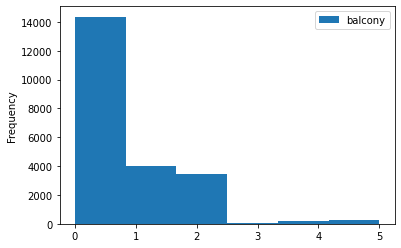

In [544]:
print(clean_data['balcony'].describe())
print(sns.boxplot(x = 'balcony', data = clean_data))
print(clean_data.plot(kind = 'hist', y = 'balcony', bins = 6))

display(clean_data.query('balcony == 5').head(5))

count    21920.000000
mean         0.510766
std          0.766903
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: balcony, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


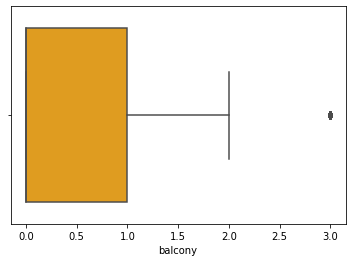

In [545]:

clean_data = clean_data.query('balcony < 4')
print(clean_data['balcony'].describe())
print(sns.boxplot(x = 'balcony', data = clean_data, color = 'orange'))

**Строки с пятью балконами выглядят неправдоподобно( 2 комнаты + 5 балконов и маленькая total_area) и побуждают сделать отсев значений**

# Дней размещения до продажи

AxesSubplot(0.125,0.125;0.775x0.755)
count    19096.000000
mean       178.382541
std        217.140425
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64


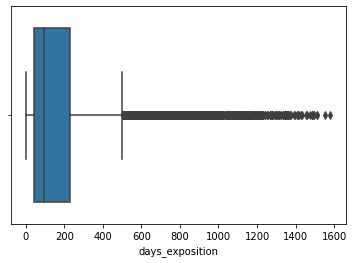

In [546]:
#Делаем срез исключая ещё не проданные квартиры
days_expos = clean_data.query('days_exposition != 9999')
print(sns.boxplot(x = 'days_exposition', data = days_expos))
print(days_expos['days_exposition'].describe())

* **Продажы совершенные в тот же день выглядят сомнительно, как и продажи с очень долгим таймингом**
* **В то же время, кореляцию проще искать в долгой продаже, нежели находить закономерности приводящие к продаже в 'тот же день' - такая скорость продажи выглядит более неестественной**


457
3176
count    18287.000000
mean       164.990321
std        177.520438
min          6.000000
25%         45.000000
50%         95.000000
75%        219.000000
max        912.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


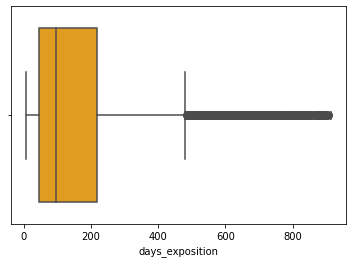

In [547]:
# Смотрим составляющие предположительно аномальных значений
print(clean_data.loc[data.loc[:,'days_exposition'] < 6 ]['days_exposition'].count())

print(clean_data.loc[data.loc[:, 'days_exposition'] > 913]['days_exposition'].count())

#Избавимся от части значений, наполняющих статистику продаж, ограничив данные сроками от 7(неделя) до 912(2.5 года) дней.

clean_data.query('(days_exposition > 6 and days_exposition < 913) or days_exposition == 9999', inplace = True)

# создадим срез отличный от значений не проданных квартир
days_expos = clean_data.query('days_exposition != 9999')
# по срезу смотрим изменения
print(days_expos['days_exposition'].describe())
print(sns.boxplot(x = 'days_exposition', data = days_expos, color = 'orange'))


**Отклоняющиеся от среднестатистических данных квартиры были исключены т.к. данных для утвердительной кореляции таких примеров недостаточно, в то же время, отдельные из них могут оказаться ошибками в данных, сильно влияющих на разные населённые пункты.**

# Количество изображений

count    21111.000000
mean         9.834352
std          5.595321
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


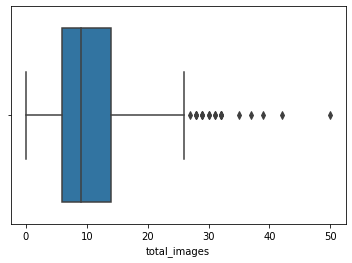

In [548]:
sns.boxplot(data = clean_data, x = 'total_images')
print(clean_data['total_images'].describe())

**Значения выглядят правдоподобно**

# Парки & Пруды

count    21111.000000
mean         0.444271
std          0.725204
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

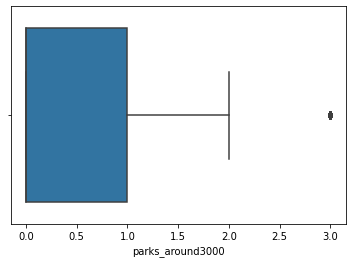

In [549]:
sns.boxplot(data = clean_data, x = 'parks_around3000')
clean_data['parks_around3000'].describe()

count    21111.000000
mean       161.334375
std        300.410502
min          0.000000
25%          0.000000
50%          0.000000
75%        283.000000
max       3190.000000
Name: parks_nearest, dtype: float64

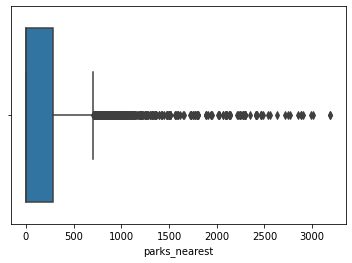

In [550]:
sns.boxplot(data = clean_data, x ='parks_nearest')
clean_data['parks_nearest'].describe()

count    21111.00000
mean         0.56165
std          0.85985
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          3.00000
Name: ponds_around3000, dtype: float64

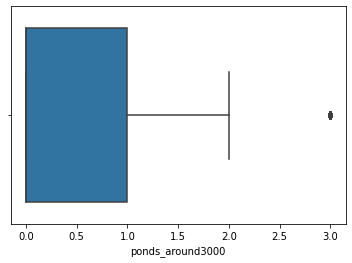

In [551]:
sns.boxplot(data = clean_data, x = 'ponds_around3000')
clean_data['ponds_around3000'].describe()

count    21111.000000
mean       195.737057
std        305.267404
min          0.000000
25%          0.000000
50%          0.000000
75%        379.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

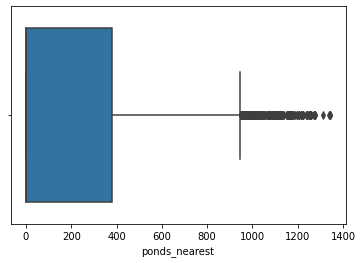

In [552]:
sns.boxplot(data = clean_data, x = 'ponds_nearest')
clean_data['ponds_nearest'].describe()

In [553]:
#Приведение к целочисленным значениям

clean_data['parks_around3000'] = clean_data['parks_around3000'].astype(int)
clean_data['ponds_around3000'] = clean_data['ponds_around3000'].astype(int)


* **Выдающихся значений не наблюдается.**

# Аэропорт & Центр Города


In [554]:
clean_data['airports_nearest'].isna().sum()

5104

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,3.03,12,14.400000,5,False,...,9.100000,0,городской поселок Янино-1,NaN,NaN,0,0.0,0,0.0,55.0
8,20,2900000,33.16,2018-05-23,1,3.03,27,15.430000,26,False,...,8.810000,0,Мурино,NaN,NaN,0,0.0,0,0.0,189.0
12,10,3890000,54.00,2016-06-30,2,2.67,5,30.000000,5,False,...,9.000000,0,Сертолово,NaN,NaN,0,0.0,0,0.0,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.000000,15,False,...,11.000000,2,Кудрово,NaN,NaN,0,0.0,0,0.0,60.0
30,12,2200000,32.80,2018-02-19,1,2.90,9,18.735722,2,False,...,5.742507,0,Коммунар,NaN,NaN,0,0.0,0,0.0,63.0
37,10,1990000,45.80,2017-10-28,2,2.50,5,26.161466,1,False,...,8.018501,0,поселок городского типа Красный Бор,NaN,NaN,0,0.0,0,0.0,196.0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.300000,9,False,...,11.600000,0,Мурино,NaN,NaN,0,0.0,0,0.0,103.0
47,17,3600000,56.10,2018-10-18,3,2.60,4,42.500000,3,False,...,5.700000,1,Гатчина,NaN,NaN,0,0.0,0,0.0,179.0
60,3,2740000,35.00,2018-01-01,1,2.60,12,19.992387,8,False,...,6.127675,0,Мурино,NaN,NaN,0,0.0,0,0.0,11.0
64,13,3100000,44.30,2017-11-07,2,2.50,5,29.000000,5,False,...,5.300000,0,Гатчина,NaN,NaN,0,0.0,0,0.0,143.0


AxesSubplot(0.125,0.125;0.775x0.755)
count    16007.000000
mean     28882.568626
std      12818.453617
min          0.000000
25%      18399.000000
50%      26890.000000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64


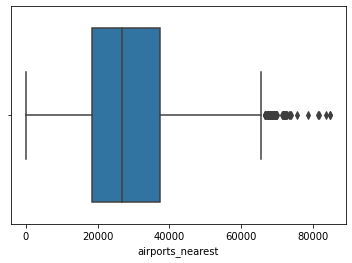

In [555]:
display(clean_data[clean_data['airports_nearest'].isna() == True ].head(10))
print(sns.boxplot(data = clean_data, x = 'airports_nearest'))
print(clean_data['airports_nearest'].describe())

In [556]:
display(clean_data[clean_data['airports_nearest'] == 84853.000000])
#Проверим правдиво ли максимальное растояние.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5340,19,3600000,50.6,2019-03-19,2,2.5,5,29.9,4,False,...,7.0,1,поселок Молодежное,84853.0,65952.0,0,0.0,0,0.0,9999.0


In [557]:
import numpy as np
# Так как, в дальнейшем пропуски в этом столбце нам непомешают - превратим странное растояние 0 в отсутствие значения.
clean_data['airports_nearest'] = clean_data['airports_nearest'].where(clean_data['airports_nearest'] > 50, other = np.nan)

print(clean_data['airports_nearest'].describe())


count    16006.000000
mean     28884.373110
std      12816.820777
min       6450.000000
25%      18399.500000
50%      26891.500000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64


**Удалили нулевое значение, чтобы не использовать в дальнейшем лишние срезы**

In [558]:
clean_data['cityCenters_nearest'].isna().sum()

5087

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000,30.40,2018-09-10,1,3.03,12,14.400000,5,False,...,9.100000,0,городской поселок Янино-1,NaN,NaN,0,0.0,0,0.0,55.0
8,20,2900000,33.16,2018-05-23,1,3.03,27,15.430000,26,False,...,8.810000,0,Мурино,NaN,NaN,0,0.0,0,0.0,189.0
12,10,3890000,54.00,2016-06-30,2,2.67,5,30.000000,5,False,...,9.000000,0,Сертолово,NaN,NaN,0,0.0,0,0.0,90.0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.000000,15,False,...,11.000000,2,Кудрово,NaN,NaN,0,0.0,0,0.0,60.0
30,12,2200000,32.80,2018-02-19,1,2.90,9,18.735722,2,False,...,5.742507,0,Коммунар,NaN,NaN,0,0.0,0,0.0,63.0


AxesSubplot(0.125,0.125;0.775x0.755)
count    16024.000000
mean     14548.308662
std       8598.537960
min        208.000000
25%       9874.000000
50%      13313.000000
75%      16464.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64


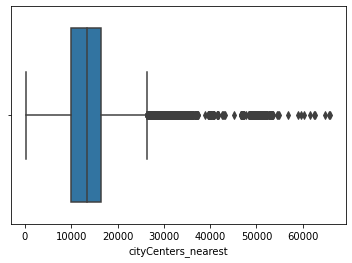

In [559]:
display(clean_data[clean_data['cityCenters_nearest'].isna() == True].head(5))
print(sns.boxplot(data = clean_data, x = 'cityCenters_nearest'))
print(clean_data['cityCenters_nearest'].describe())

In [560]:
display(clean_data[clean_data['cityCenters_nearest'] == 65952.000000])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5340,19,3600000,50.6,2019-03-19,2,2.5,5,29.9,4,False,...,7.0,1,поселок Молодежное,84853.0,65952.0,0,0.0,0,0.0,9999.0


**Строки не требуют явного вмешательства, а максимумы значений выглядят вполне правдоподобно**

**Пропуски оставлены, чтобы не нагружать дальше ненужными срезами**

In [561]:
#подведём итог по dataframe
display(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21111 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21111 non-null  int64         
 1   last_price            21111 non-null  int64         
 2   total_area            21111 non-null  float64       
 3   first_day_exposition  21111 non-null  datetime64[ns]
 4   rooms                 21111 non-null  int64         
 5   ceiling_height        21111 non-null  float64       
 6   floors_total          21111 non-null  int64         
 7   living_area           21111 non-null  float64       
 8   floor                 21111 non-null  int64         
 9   is_apartment          21111 non-null  bool          
 10  studio                21111 non-null  bool          
 11  open_plan             21111 non-null  bool          
 12  kitchen_area          21111 non-null  float64       
 13  balcony         

None

In [562]:
# Смотрим % удалённых данных
print('Процент удаления:',(first_data_info.shape[0] - clean_data.shape[0]) / first_data_info.shape[0] *100, '%')

Процент удаления: 10.413749204328452 %


* **Процент удалённых, в ходе обработки, данных удовлетворим для продолжения анализа**

0    120370
1     82920
2     92785
5     95065
6     99195
Name: sq_meter_price, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
count     21111.000000
mean      94240.597272
std       32421.236344
min        7962.000000
25%       75402.500000
50%       93600.000000
75%      111489.000000
max      392354.000000
Name: sq_meter_price, dtype: float64
Минимальные значения стоимости метра:
               locality_name  sq_meter_price
14911  поселок станции Свирь            7962
4405                  Сланцы            9615
11351                 Сланцы           10185
9581      деревня Старополье           10368
23477                Гатчина           10507
23484                 Сланцы           10561
Максимальное значение стоимости метра:
         locality_name  sq_meter_price
9694   Санкт-Петербург          392354
14741  Санкт-Петербург          387096
10193  Санкт-Петербург          355555
4713   Санкт-Петербург          355555
1243   Санкт-Петербург          324727
19232  Санкт-Петербур

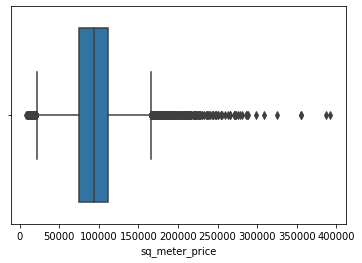

In [563]:
#Подсчитываем стоимость квадратного метра для каждой квартиры и подводи к целочисленному виду, убирая большие дробные части

clean_data['sq_meter_price'] = clean_data['last_price'] / clean_data['total_area']
clean_data['sq_meter_price'] = clean_data['sq_meter_price'].astype(int)
print(clean_data['sq_meter_price'].head())

#Получившийся столбец носит в себе числовые значения - проверяем выбивающиеся из нормы значения:
print(sns.boxplot(x = 'sq_meter_price', data = clean_data))
# Cмотрим минимумы и максимумы:
print(clean_data['sq_meter_price'].describe())

print('Минимальные значения стоимости метра:')
print(clean_data[['locality_name', 'sq_meter_price']].sort_values(by = 'sq_meter_price', ascending = True).head(6))

print('Максимальное значение стоимости метра:')
print(clean_data[['locality_name', 'sq_meter_price']].sort_values(by = 'sq_meter_price', ascending = False).head(6))

#Принимаем решение не обрабатывать значения столбца, основываясь на локальном расположении


In [564]:
#Добавляем сортировку по День\месяц\Год

clean_data['year'] = clean_data['first_day_exposition'].dt.year

clean_data['weekday'] = clean_data['first_day_exposition'].dt.weekday

clean_data['month'] = clean_data['first_day_exposition'].dt.month

clean_data[['weekday','month', 'year']].head(10)

,weekday,month,year
0,3,3,2019
1,1,12,2018
2,3,8,2015
5,0,9,2018
6,3,11,2017
7,3,4,2019
8,2,5,2018
9,6,2,2017
10,3,11,2017
11,0,8,2018


In [565]:
def type_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
clean_data['type_floor'] = clean_data.apply(type_floor, axis = 1)

clean_data['type_floor'].head(10)

0     другой
1     первый
2     другой
5     другой
6     другой
7     другой
8     другой
9     другой
10    другой
11    другой
Name: type_floor, dtype: object

In [566]:
clean_data['km_to_center'] = clean_data['cityCenters_nearest'] / 1000

print(clean_data['km_to_center'].head())


0    16.028
1    18.603
2    13.933
5       NaN
6    19.143
Name: km_to_center, dtype: float64


### Исследовательский анализ


Наибольшая стоимость квартир:
       last_price    locality_name
975      19999000  Санкт-Петербург
3894     19990000           Выборг
22172    19990000  Санкт-Петербург
6347     19980000  Санкт-Петербург
21040    19950000  Санкт-Петербург
20715    19900000  Санкт-Петербург
Наименьшая стоимость квартир:
       last_price          locality_name
17456      430000                 Сланцы
14911      430000  поселок станции Свирь
16274      440000     деревня Старополье
16219      450000   деревня Вахнова Кара
17676      450000      деревня Ям-Тесово
9581       450000     деревня Старополье


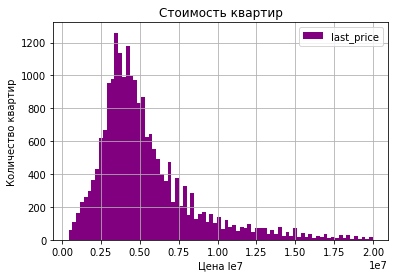

In [567]:
# После предобработки углублённо изучим числовые столбцы полученного датасета:

#Стоимость квартир:
clean_data.plot(kind = 'hist', y = 'last_price', bins = 80, grid = True, title = 'Cтоимость квартир', color = 'purple')
plt.xlabel('Цена le7')
plt.ylabel('Количество квартир')

print('Наибольшая стоимость квартир:')
print(clean_data.loc[:,['last_price', 'locality_name']].sort_values(by = 'last_price', ascending = False).head(6))
print('Наименьшая стоимость квартир:')
print(clean_data.loc[:,['last_price', 'locality_name']].sort_values(by = 'last_price', ascending = True).head(6))


*  **После предобработки основная стоимость квартир укладывается в 2.5- 5.0 миллионов, оставляя малую долю на выбивающиеся, территориально привязанные квартиры**

Наибольшая площадь квартир:
       total_area     locality_name
13931      250.00   Санкт-Петербург
19964      238.26   Санкт-Петербург
6107       236.00         Сертолово
19949      230.00   Санкт-Петербург
9736       215.20  поселок Стрельна
2673       214.00   Санкт-Петербург
Наименьшая площадь квартир:
       total_area     locality_name
4077         20.0   Санкт-Петербург
8873         20.0   Санкт-Петербург
2461         21.1  поселок Ильичево
12501        21.9   Санкт-Петербург
18231        22.0   Санкт-Петербург
15868        22.0   Санкт-Петербург


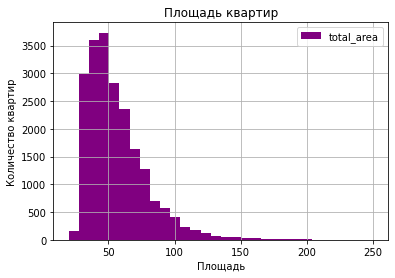

In [568]:
#Площадь квартир:
clean_data.plot(kind = 'hist', y = 'total_area', bins = 30, grid = True, title = 'Площадь квартир', color = 'purple')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

print('Наибольшая площадь квартир:')
print(clean_data.loc[:,['total_area', 'locality_name']].sort_values(by = 'total_area', ascending = False).head(6))
print('Наименьшая площадь квартир:')
print(clean_data.loc[:,['total_area', 'locality_name']].sort_values(by = 'total_area', ascending = True).head(6))


*  **Большинство квартир менее 100 квадратных метров, незначительное количество квартир не отфильтрованных во время предобработки симметрично стоимости имеют локальную привязку.**

In [ ]:
#Площадь квартир:
clean_data.plot(kind = 'hist', y = 'total_area', bins = 30, grid = True, title = 'Площадь квартир', color = 'purple')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

print('Наибольшая площадь квартир:')
print(clean_data.loc[:,['total_area', 'locality_name']].sort_values(by = 'total_area', ascending = False).head(6))
print('Наименьшая площадь квартир:')
print(clean_data.loc[:,['total_area', 'locality_name']].sort_values(by = 'total_area', ascending = True).head(6))


*  **Наибольшее множество квартиры на рынке включают в себя 1-2-3 комнаты. Небольшое количество составляют 4ех комнатные. квартиры с более 4ех комнат встречаются редко и, вероятно, представленны класом 'люкс', имеют локальную привязку.**

Text(0, 0.5, 'Количество квартир')

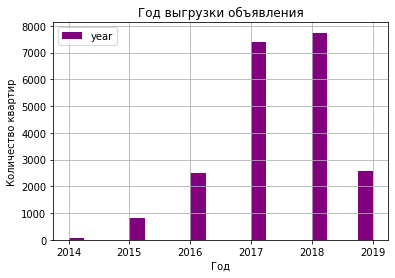

In [620]:
#Объявления по годам
clean_data.plot(kind = 'hist', y = 'year', bins = 20, grid = True, title = 'Год выгрузки объявления', color = 'purple')
plt.xlabel('Год')
plt.ylabel('Количество квартир')

* **Малое значение квартир в 2014 году обусловлено, вероятно, количеством клиентов у сервиса и послудующими его доработками, а так-же последующим кризисом ведущим к росту количества объявления**

Text(0, 0.5, 'Количество квартир')

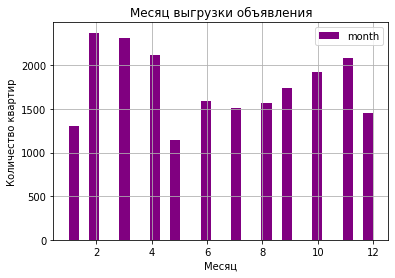

In [619]:
#Объявления по месяцам
clean_data.plot(kind = 'hist', y = 'month', bins = 30, grid = True, title = 'Месяц выгрузки объявления', color = 'purple')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

* **Тут можно выдялить зависимости в виде спада количества выкладываемых объявлений летом и, во время, за месяц до и после новогодних празддников.**

Text(0, 0.5, 'Количество квартир')

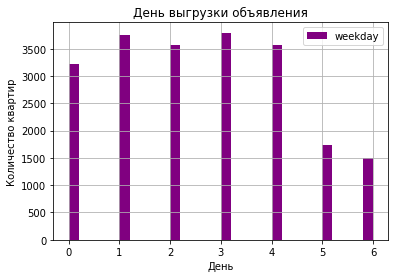

In [618]:
#Объявления по дням недели
clean_data.plot(kind = 'hist', y = 'weekday', bins = 30, grid = True, title = 'День выгрузки объявления', color = 'purple')
plt.xlabel('День')
plt.ylabel('Количество квартир')


* **В выходные объявления выкладывают в два раза реже чем в другие дни**

Наибольшее количество балконов:
3
Наименьшее количество балконов:
0


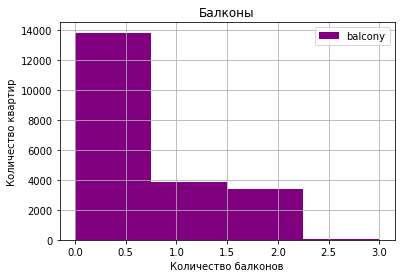

In [570]:
#Количество балконов:
clean_data.plot(kind = 'hist', y = 'balcony', bins = 4, grid = True, title = 'Балконы', color = 'purple')
plt.xlabel('Количество балконов')
plt.ylabel('Количество квартир')

print('Наибольшее количество балконов:')
print(clean_data['balcony'].sort_values( ascending = False).max())
print('Наименьшее количество балконов:')
print(clean_data['balcony'].sort_values( ascending = True).min())

*  **Наличие балкона не свойственно для большего множества квартир, остальное распределение сосредоточено в пределе 1-2 на квартиру.**

Наибольшеая высота потолков:
5.3
Наименьшая высота потолков:
2.2


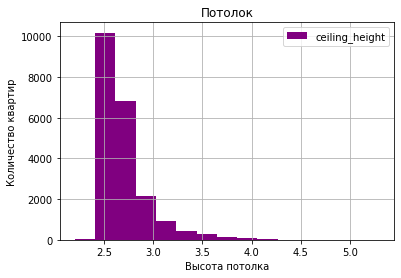

In [571]:
#Высота потолков:
clean_data.plot(kind = 'hist', y = 'ceiling_height', bins = 15, grid = True, title = 'Потолок', color = 'purple')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')

print('Наибольшеая высота потолков:')
print(clean_data['ceiling_height'].sort_values( ascending = False).max())
print('Наименьшая высота потолков:')
print(clean_data['ceiling_height'].sort_values( ascending = True).min())

* **Высота потолков тяеготеет к некоему стандарту, около 2.5 - 2.75 метра. Вероятно высоты выше и ниже привязаны к архитектурным периодам старых застроек, а редкое явление большой высоты - двухэтажные квартиры.**

Наибольшие площади кухни:
6405     39.9
18347    39.7
7331     39.0
20916    39.0
3870     39.0
2418     39.0
Name: kitchen_area, dtype: float64
Наименьшие площади кухни:
1280     4.026758
6432     4.026758
2384     4.026758
8894     4.026758
14980    4.026758
21718    4.026758
Name: kitchen_area, dtype: float64


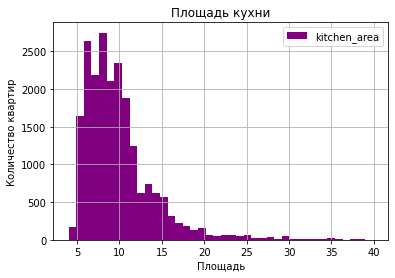

In [572]:
#Площадь кухни:
clean_data.plot(kind = 'hist', y = 'kitchen_area', bins = 40, grid = True, title = 'Площадь кухни', color = 'purple')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

print('Наибольшие площади кухни:')
print(clean_data['kitchen_area'].sort_values( ascending = False).head(6))
print('Наименьшие площади кухни:')
print(clean_data['kitchen_area'].sort_values( ascending = True).head(6))

* **Основной разброс площадей кухни приходится на 5-15 метров и с увеличением площади встречается всё реже и реже.**


Наибольшие жилые площади:
18790    145.4
5451     145.0
16199    145.0
19949    142.0
4710     142.0
12549    140.0
Name: living_area, dtype: float64
Наименьшие жилые площади:
23481    10.08
7268     10.08
21854    10.30
10475    10.30
8315     10.40
4457     10.40
Name: living_area, dtype: float64


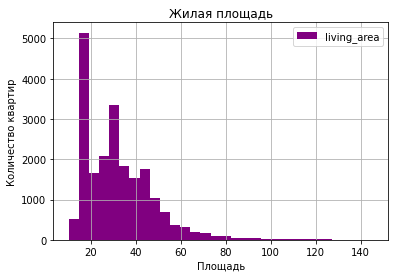

In [573]:
#Жилая площадь:
clean_data.plot(kind = 'hist', y = 'living_area', bins = 30, grid = True, title = 'Жилая площадь', color = 'purple')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')

print('Наибольшие жилые площади:')
print(clean_data['living_area'].sort_values( ascending = False).head(6))
print('Наименьшие жилые площади:')
print(clean_data['living_area'].sort_values( ascending = True).head(6))

* **Тройной пик графика, вероятно, вызван тяготением площадей к наиболее типичным объемам для 1-2-3ех комнатных квартир, при сосредоточении основого разброса в 15 - 45 метрах жилой площади.**

Наибольшее количество изображений:
50 

Наименьшее количество изображений:
0


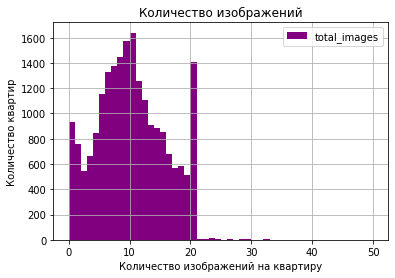

In [574]:
clean_data.plot(kind = 'hist', y = 'total_images', bins = 50, grid = True, title = 'Количество изображений', color = 'purple')
plt.xlabel('Количество изображений на квартиру')
plt.ylabel('Количество квартир')

print('Наибольшее количество изображений:')
print(clean_data['total_images'].max(), '\n')
print('Наименьшее количество изображений:')
print(clean_data['total_images'].min())


* **Необычным в распределении выглядит только пик в районе 20ти изображений, что может быть каким-то стандартом продажного агенства?**

Наименьший этаж квартиры:
1 

Наибольший этаж квартиры:
33


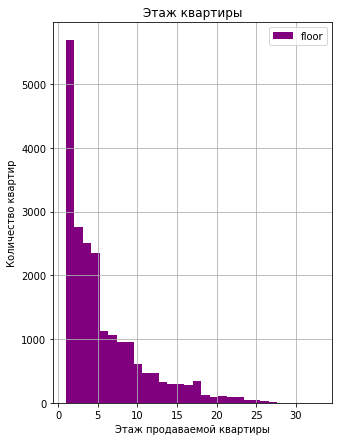

In [622]:
#Этаж
clean_data.plot(kind = 'hist', y = ['floor'], bins = 30, figsize = (5,7), grid = True, color = 'purple',title = 'Этаж квартиры')
plt.xlabel('Этаж продаваемой квартиры')
plt.ylabel('Количество квартир')

print('Наименьший этаж квартиры:')
print(clean_data['floor'].sort_values( ascending = False).min(),'\n')
print('Наибольший этаж квартиры:')
print(clean_data['floor'].sort_values( ascending = True).max())

* **Наибольший пик продаж достаётся квартирам расположенным на первом этаже**

Самый низкий дом:
2 этажа. 

Самый высокий дом:
36 этажа.


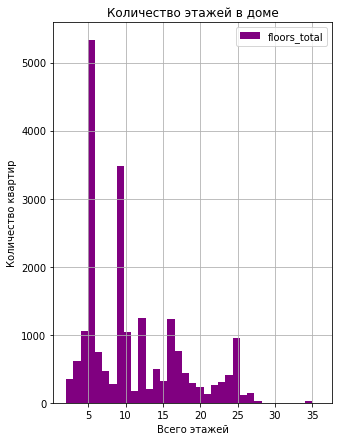

In [624]:
# Всего этажей
clean_data.plot(kind = 'hist', y = ['floors_total'], bins = 35, figsize = (5,7), grid = True, color = 'purple',
                title = 'Количество этажей в доме')
plt.xlabel('Всего этажей')
plt.ylabel('Количество квартир')



print('Самый низкий дом:')
print(clean_data['floors_total'].sort_values( ascending = False).min(), 'этажа.','\n')
print('Самый высокий дом:')
print(clean_data['floors_total'].sort_values( ascending = True).max(), 'этажа.')

* **Пик пятиэтажных зданий, вероятно, обусловлен большим количеством хрущёвок, которые в стандарте имеют 4-5 этажей. Квартиры, предположительно, не являются новыми и, с большей вероятностью поступают на продажу.**

* **Пик 9ти этажных зданий отсылает нас в период Брежнева к новым стандартам застройки - 9-12 этажей. Перепродажа таких квартир, интуитивно, более вероятна, чем в новостройках.**

Наименьшее указанное растояние до аэропорта:
6450.0
Наибольшее указанное растояние до аэропорта:
84853.0 

Наименьшее указанное растояние до центра города:
208.0
Наибольшее указанное растояние до цента города:
65952.0


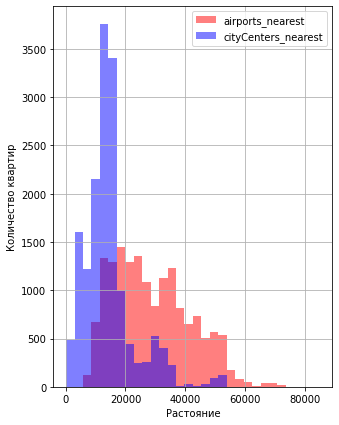

In [625]:
# Растояние до аэропорта и центра города

clean_data.plot(kind = 'hist', y = ['airports_nearest','cityCenters_nearest'], bins = 30, figsize = (5,7), grid = True, color = ['red', 'blue'], alpha = 0.5)
plt.xlabel('Растояние')
plt.ylabel('Количество квартир')



print('Наименьшее указанное растояние до аэропорта:')
print(clean_data['airports_nearest'].min())
print('Наибольшее указанное растояние до аэропорта:')
print(clean_data['airports_nearest'].max(),'\n')

print('Наименьшее указанное растояние до центра города:')
print(clean_data['cityCenters_nearest'].min())
print('Наибольшее указанное растояние до цента города:')
print(clean_data['cityCenters_nearest'].max())

* **Основная масса квартир занимает определённы радиус растояния от центра города(5 - 20км) , в то время как растояние до аэропорта, если двигаться по этому радиусу - более изменчиво(10-40км).**

Максимум указано парков в радиусе 3000 мтров:
3 

Максимум указано прудов в радиусе 3000 мтров:
3


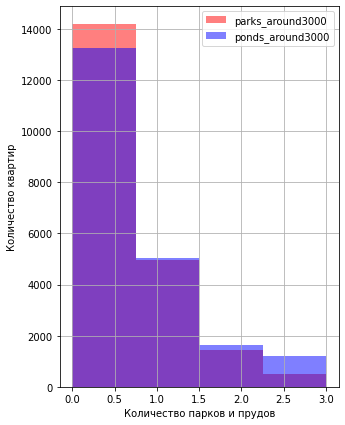

In [626]:
#Количество парков и прудов в радиусе 3000 метров

#parks_around3000 and ponds_around3000
clean_data.plot(kind = 'hist', y = ['parks_around3000','ponds_around3000'], bins = 4, figsize = (5,7), grid = True, color = ['red', 'blue'], alpha = 0.5)
plt.xlabel('Количество парков и прудов')
plt.ylabel('Количество квартир')



print('Максимум указано парков в радиусе 3000 мтров:')
print(clean_data['parks_around3000'].max(),'\n')

print('Максимум указано прудов в радиусе 3000 мтров:')
print(clean_data['ponds_around3000'].max())


* **Основная масса квартир не имеет в радиусе 3000 метров парков и прудов, или эти значения остались неуказанными. 
Наличие по убывающей 1 - 2 - 3 в радиусе, соответственно.**

Отсутствующих значений по паркам: parks_nearest    14177
dtype: int64 

Наименьшее указанное растояние до парка:
1.0
Наибольшее указанное растояние до парка:
3190.0


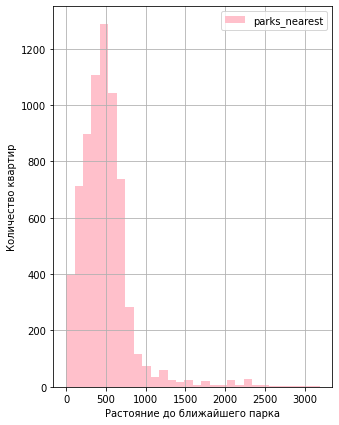

In [627]:
#parks_nearest and ponds_nearest
# Так как нуливое растояние - есть отсутствие, построим график без него уточнив количество отсутствующих значений
print('Отсутствующих значений по паркам:',clean_data.loc[:,['parks_nearest']].query('parks_nearest == 0').count(),'\n')
#print('Отсутствующих значений по прудам:',clean_data.loc[:,['ponds_nearest']].query('ponds_nearest == 0').count())
#делаем срез 
parks = clean_data.query('parks_nearest != 0')

parks.plot(kind = 'hist', y = ['parks_nearest'], bins = 30, figsize = (5,7), grid = True, color = ['pink'], alpha = 1)
plt.xlabel('Растояние до ближайшего парка')
plt.ylabel('Количество квартир')



print('Наименьшее указанное растояние до парка:')
print(parks['parks_nearest'].min())
print('Наибольшее указанное растояние до парка:')
print(parks['parks_nearest'].max())

* **Основной объем парковых зон находится в радиусе километра от продаваемых квартир**

Отсутствующих значений по прудам: ponds_nearest    13265
dtype: int64
Наименьшее указанное растояние до пруда:
13.0
Наибольшее указанное растояние до пруда:
1344.0


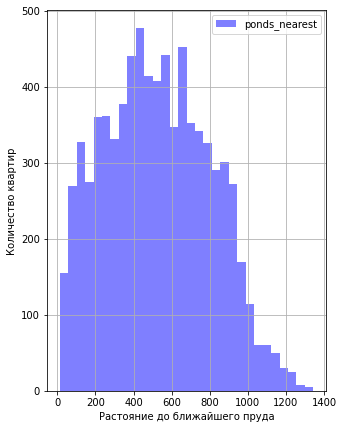

In [628]:
#parks_nearest and ponds_nearest
# Так как нуливое растояние - есть отсутствие, построим график без него уточнив количество отсутствующих значений

print('Отсутствующих значений по прудам:',clean_data.loc[:,['ponds_nearest']].query('ponds_nearest == 0').count())

ponds = clean_data.query('ponds_nearest != 0')

ponds.plot(kind = 'hist', y = ['ponds_nearest'], bins = 30, figsize = (5,7), grid = True, color = ['blue'], alpha = 0.5)
plt.xlabel('Растояние до ближайшего пруда')
plt.ylabel('Количество квартир')


print('Наименьшее указанное растояние до пруда:')
print(ponds['ponds_nearest'].min())
print('Наибольшее указанное растояние до пруда:')
print(ponds['ponds_nearest'].max())

* **Основной объем значений находится в подобном паркам радиусе**

In [581]:
# Объемы булевых значений.

#Апартоменты
print('Квартир являющихся апартоментами:')
print(clean_data[clean_data['is_apartment'] == True]['is_apartment'].count(),'\n')

print('Объем апартоментов от общего количества:')
print((clean_data[clean_data['is_apartment'] == True]['is_apartment'].count())/(clean_data['is_apartment'].count())*100, '%')

Квартир являющихся апартоментами:
37 

Объем апартоментов от общего количества:
0.17526408033726493 %


* **Квартиры пригодные для жилья, со всем необходимым, но в которых нельзя оформить постоянную регистрацию составляют меньше двух десятых процента**

In [582]:
#Наличие открытого плана

print('Квартир с наличием планировки:')
print(clean_data[clean_data['open_plan'] == True]['open_plan'].count(),'\n')

print('Доля квартир с наличием планировки от общего:')
print((clean_data[clean_data['open_plan'] == True]['open_plan'].count())/(clean_data['open_plan'].count())*100, '%')

Квартир с наличием планировки:
7 

Доля квартир с наличием планировки от общего:
0.03315806925299607 %


* **Доля квартир с наличием планировки составляет незначительное количество.**

In [583]:
#Является ли квартира - студией

print('Квартира - студия :')
print(clean_data[clean_data['studio'] == True]['studio'].count(),'\n')

print('Доля квартир-студий от общего количества:')
print((clean_data[clean_data['studio'] == True]['studio'].count())/(clean_data['studio'].count())*100, '%')

Квартира - студия :
9 

Доля квартир-студий от общего количества:
0.04263180332528066 %


* **Интуитивно, значение кажется очен малым. Вероятно - не все указывают этот параметр.**

Наибольшие цены за квадратный метр:
9694     392354
14741    387096
10193    355555
4713     355555
1243     324727
19232    308333
Name: sq_meter_price, dtype: int64 

Наименьшие цены за квадратный метр::
14911     7962
4405      9615
11351    10185
9581     10368
23477    10507
23484    10561
Name: sq_meter_price, dtype: int64 

Средняя стоимость квадратного метра в датасете:
94240 

Медианная стоимость квадратного метра в датасете:
93600


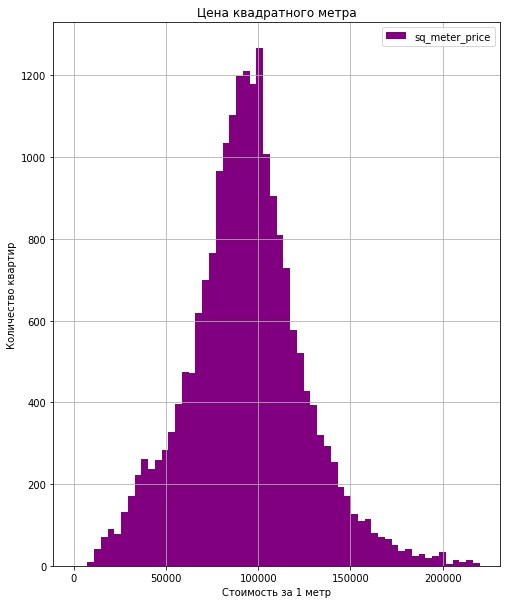

In [584]:
# Стоимость квадратного метра

clean_data.plot(kind = 'hist', y = 'sq_meter_price', bins = 60, grid = True, title = 'Цена квадратного метра',
                range = (0, 220000),
               figsize = (8,10), color = 'purple')
plt.xlabel('Cтоимость за 1 метр')
plt.ylabel('Количество квартир')

print('Наибольшие цены за квадратный метр:')
print(clean_data['sq_meter_price'].sort_values( ascending = False).head(6),'\n')
print('Наименьшие цены за квадратный метр::')
print(clean_data['sq_meter_price'].sort_values( ascending = True).head(6),'\n')

print('Средняя стоимость квадратного метра в датасете:')
print(clean_data['sq_meter_price'].mean().astype(int), '\n')

print('Медианная стоимость квадратного метра в датасете:')
print(clean_data['sq_meter_price'].median().astype(int))


* **Гистограмма цен на квадратный метр характеризуется как нормальное Гауссово распределение с пиком в центре, и тяготеющими к симметрии боковыми сторонами. Медиана и средняя цена за квадратный метр около 93к.**

Среднее время продажи квартир:
164.99032099305518 

Медиана времени продажи квартиры:
95.0 

Наименьший срок продажи квартиры в датасете:
6.000000000000001 

Наибольший срок продажи квартиры в датасете:
912.0


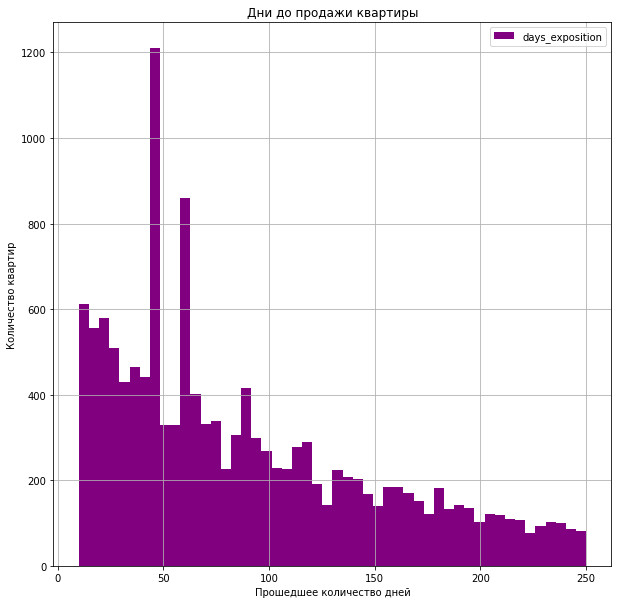

In [630]:
#Дни до продажи квартиры

# срезом уберём значения, обозначенные нами как отсутствие продажи (9999)

pos_expos = clean_data.query('days_exposition < 9999')
pos_expos.plot(kind = 'hist', bins = 50, y = 'days_exposition', title = 'Дни до продажи квартиры', figsize = (10,10),
               color = 'purple', range = (10, 250), grid = True)
plt.xlabel('Прошедшее количество дней')
plt.ylabel('Количество квартир')


print('Среднее время продажи квартир:')
print(pos_expos['days_exposition'].mean(), '\n')

print('Медиана времени продажи квартиры:')
print(pos_expos['days_exposition'].median(), '\n')

print('Наименьший срок продажи квартиры в датасете:')
print(pos_expos['days_exposition'].min(), '\n')

print('Наибольший срок продажи квартиры в датасете:')
print(pos_expos['days_exposition'].max())

* **Большая часть квартир продаётся за период окло медианы ~100 дней, однако, среднее значение срока продажи квартиры сильно отягощается продажами совершаемыми за год и более.**
* **Быстрыми можно считать продажи укладывающиеся в 50 дней и менее.**
* **Аномально долгими - выходящими за срок 240 дней и более.**

# Определение корреляций параметров

           Корреляция цены и площади 

            last_price  total_area
last_price    1.000000    0.891183
total_area    0.891183    1.000000


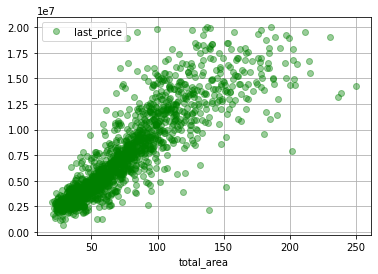

In [631]:
# Зависимость цены от площади
print('           Корреляция цены и площади', '\n')
(clean_data.pivot_table(index = 'total_area', values = 'last_price')
.plot(grid = True, style = 'o', color = 'green',alpha = 0.4))

print(clean_data.pivot_table(index = 'floor', values = ['last_price','total_area']).corr())

* **Чем больше площадь, тем больше стоимость. Корреляция крайне высокая.**

             Корреляция цены и жилой площади 

             last_price  living_area
last_price     1.000000     0.728244
living_area    0.728244     1.000000


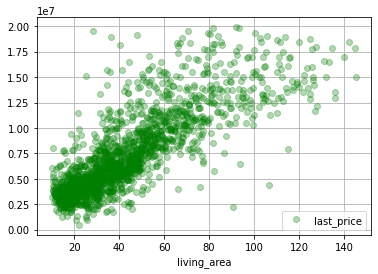

In [587]:
# Зависимость от жилой площади 

print('             Корреляция цены и жилой площади','\n')

(clean_data.pivot_table(index = 'living_area',  values = 'last_price' )
.plot(style = 'o', grid = True, color = 'green', alpha = 0.3))

print(clean_data.pivot_table(index = 'floor', values = ['living_area', 'last_price']).corr())

* **Кореляция жилой площади и цены менее выражена относительно общей площади квартиры, но также большая, ввиду взаимосвязи данных категорий.**

             Корреляция цены и площади кухни 

              kitchen_area  last_price
kitchen_area      1.000000    0.496131
last_price        0.496131    1.000000


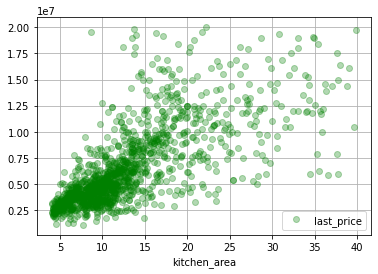

In [588]:
# Зависимость от площади кухни

print('             Корреляция цены и площади кухни','\n')

(clean_data.pivot_table(index = 'kitchen_area',  values = 'last_price' )
.plot(style = 'o', grid = True, color = 'green', alpha = 0.3))

print(clean_data.pivot_table(index = 'floor', values = ['kitchen_area', 'last_price']).corr())

* **Корреляций площади кухни менее показательна чем кореляции общей и жилой площадей, однако так же остаётся на достаточно высоком уровне.**

         Корреляция цены и количества комнат
            last_price     rooms
last_price    1.000000  0.569858
rooms         0.569858  1.000000


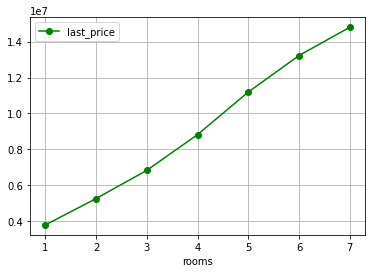

In [589]:
#Зависимость цены от количества комнат

print('         Корреляция цены и количества комнат')

clean_data.pivot_table(index = 'rooms', values = 'last_price').plot(grid = True, style = 'o-',
                                                                   color = 'green')

print(clean_data.pivot_table(index = 'floor', values = ['last_price', 'rooms']).corr())


* **Корреляция цены и числа комнат выглядит практичски линейно-зависимой,больше комнат - больше цена, но значительно уступает площади.**

      Корреляция цены и расположения на этаже 


<AxesSubplot:xlabel='type_floor'>

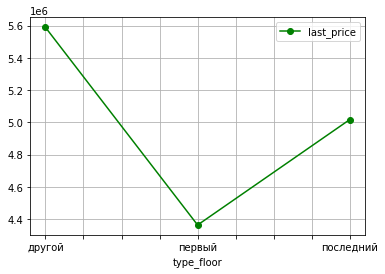

In [590]:
# Зависимость цены от этажа
print('      Корреляция цены и расположения на этаже ')

(clean_data.pivot_table(index = 'type_floor', values = 'last_price')
.plot(grid = True, style = 'o-', color = 'green'))

* **Квартиры расположенные на первом этаже значительно дешевле остальных.**
* **Последний этаж тоже влияет на стоимость и уступает квартирам на других этажах, кроме первого.**

        Корреляция цены и растояния до центра 

              km_to_center  last_price
km_to_center      1.000000    0.610544
last_price        0.610544    1.000000


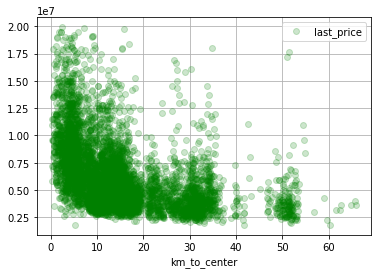

In [591]:
# Зависимость от растояния до центра

print('        Корреляция цены и растояния до центра','\n')

(clean_data.pivot_table(index = 'km_to_center',  values = 'last_price' )
.plot(style = 'o', grid = True, color = 'green', alpha = 0.2))

print(clean_data.pivot_table(index = 'floor', values = ['km_to_center', 'last_price']).corr())

* **Цены на квартиры растут прямопропорционально по приближению к центру**

     Корреляция цены и дня размещения объявления 

            last_price   weekday
last_price    1.000000  0.583505
weekday       0.583505  1.000000


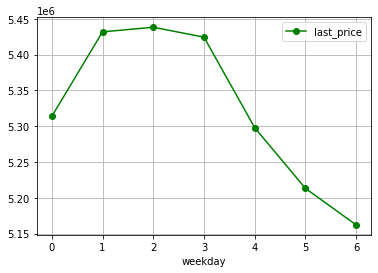

In [592]:
# Зависимость цены от дня недели? Кажется немного странным делать такую зависимость но

print('     Корреляция цены и дня размещения объявления','\n')

(clean_data.pivot_table(index = 'weekday',  values = 'last_price' )
.plot(style = 'o-', grid = True, color = 'green', alpha = 1))

print(clean_data.pivot_table(index = 'floor', values = ['weekday', 'last_price']).corr())

* **Изменение цен происходит вокруг небольшого края общего значения, в котором наблюдается зависимость по ходу недели. С пятницы(включительно) цена понемногу падает, а в понедельник(включительно) понемногу возрастает**

* **Если учитывать эту зависимость и спад количества выкладываемых объявлений в выходные то - такие объявления,скорее, выкладываются из необходимости продажи, что сопровождается чуть сниженной ценой.**

* **Объявления в другие дни больше походят на холодные продажи**


     Корреляция цены и месяца размещения объявления 

            last_price    month
last_price     1.00000  0.01313
month          0.01313  1.00000


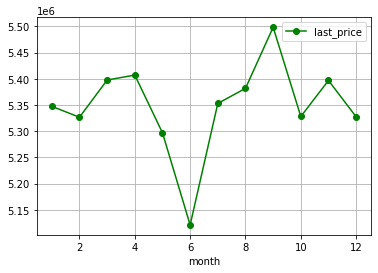

In [593]:
# Зависимость цены от месяца размещения объявления

print('     Корреляция цены и месяца размещения объявления','\n')

(clean_data.pivot_table(index = 'month',  values = 'last_price' )
.plot(style = 'o-', grid = True, color = 'green', alpha = 1))

print(clean_data.pivot_table(index = 'floor', values = ['month', 'last_price']).corr())

* **Минимум стоимости размещаемых квартир приходится на начало летнего сезона(июнь).**
* **Пик стоимости размещаемых объявлений приходится на начало осени(сентябрь).**
* **Стоимость квартир в объявлениях размещенных в первую половину года, практически на всех участках меньше чем у объявлений размещаемых во второй половине.**

     Корреляция цены и года размещения объявления 

            last_price      year
last_price    1.000000  0.054524
year          0.054524  1.000000


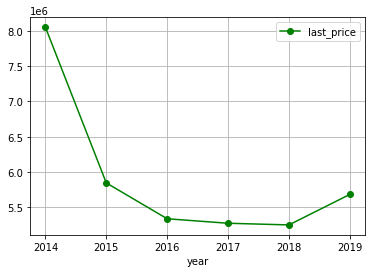

In [594]:
# Зависимость цены от года размещения объявления

print('     Корреляция цены и года размещения объявления','\n')

(clean_data.pivot_table(index = 'year',  values = 'last_price' )
.plot(style = 'o-', grid = True, color = 'green', alpha = 1))

print(clean_data.pivot_table(index = 'floor', values = ['year', 'last_price']).corr())

* **Стоимость квартир идёт на спад с 2014 года и только в 2019 наблюдается небольшой рост. Для полной картины недостаёт большого запаса данных по специфичным 2020-2021ому годам.**

# Отсев по количеству объявлений и работа со локальными значениями

In [595]:
top10 = clean_data['locality_name'].value_counts().head(10)

top10_price = (clean_data.query('locality_name in (@top10.index)')
               .pivot_table(index = 'locality_name', values = 'sq_meter_price')
              .sort_values('sq_meter_price', ascending = False)
              .astype(int))
print(top10_price)

                   sq_meter_price
locality_name                    
Санкт-Петербург            108185
Пушкин                     101248
Кудрово                     95115
поселок Парголово           90108
Мурино                      85153
поселок Шушары              78315
Колпино                     74954
Гатчина                     68374
Всеволожск                  67226
Выборг                      58188


* **Среди населённых пунктов с наибольшим количеством объявлений самый дорогой квадратный метр в Санкт-Петербурге, остальные локации являются пунктами радом или примыкающими к Санкт-Петербургу.** 

AxesSubplot(0.125,0.125;0.775x0.755)
                last_price
km_to_center              
1             1.028535e+07
2             9.662026e+06
3             9.062113e+06
4             9.491851e+06
5             8.737378e+06
6             8.115173e+06
7             7.887445e+06
8             7.176648e+06
9             5.988230e+06
10            5.861399e+06
11            5.646760e+06
12            5.878192e+06
13            5.844897e+06
14            5.506192e+06


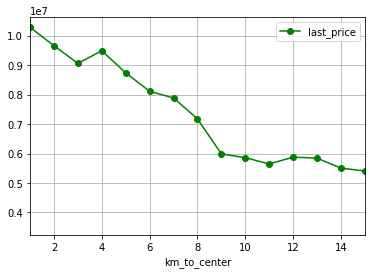

In [596]:
spb_data = clean_data.query('locality_name == "Санкт-Петербург"')
spb_data['km_to_center'].fillna(0, inplace = True)
spb_data['km_to_center'] = spb_data['km_to_center'].astype(int)

print((spb_data.pivot_table(index = 'km_to_center', values = 'last_price')
       .plot(style = 'o-', color = 'green', grid = True, xlim = (1,15) )))

spb_data = spb_data.query('km_to_center > 0 and km_to_center < 15')

print(spb_data.pivot_table(index = 'km_to_center', values = 'last_price', aggfunc = 'mean'))


* **Наблюдается резкий рост стоимости жилья в Санкт-Петербурге по мере приближений к центру с 8ого километра.**

### Общий вывод

**Итог запрошенного исследования**

* по запросу сервиса 'Яндекс Недвижимость' были определены параметры имеющие наибольшую корреляцию со стоимостью квартир в объявлениях.

 

**Корреляции** : Параметры взаимозависимые с рыночной стоимостью.
* Наибольшая корреляция стоимости жилья наблюдается у общей площади(total_area), её нужно учитывать в первую очередь при определении рыночной стоимости. Корреляция ~0.9
* Вторыми во внимание нужно учитывать оставшиеся площади(жилая(living_area). Корреляция ~ 0.7
* Третьими по влиянию на стоимость являются: площадь кухни(kitchen_area)) и количество комнат(rooms) в квартире(до 6, включительно). Корреляция ~0.5
* Четвёртым по полезному действию для определения цены является корреляция растояния до центра города(cityCenters_nearest), но её показательность сомнительна для населённых пунктов далёких от Санкт-Петербурга. Корреляция ~ 0.4



**Показательные параметры** : Статистические закономерности, отхождение от которых может помочь в отслеживании аномалий и мониторинге мошеннической деятельности.

* Наблюдается закономерность в относительной стоимости квартир относительно расположения на этаже. Квартиры на первом этаже - значительно дешевле, чем остальные. Квартиры на последнем этаже, в среднем, дороже квартир на первом этаже и дешевле квартир на других этажах. 

* Объявления о продаже квартир в июне имеют минимальную стоимость в году. Объявления о продаже квартиры в сентябре имеют максимальную стоимость в году. 

* Наблюдается зависимость по ходу недели. С пятницы(включительно) цена понемногу падает, а в понедельник(включительно) понемногу возрастает.